>Use a tabular representation of the state space,
and ensure that the starting and end locationof the passenger are random. 
    >Exploration should be softmax. You will need to run the following protocol. 
    >You will do 10 independent runs. 
    >Each run consists of 100 segments, in each segment there are 10 episodes of training, 
        followed by 1 episode in which you simply run the optimal policy so far. 
        Pick 3 settings of the temperature parameter and 3 settings of the learning rate. 
    

You need to plot:
• One u-shaped graph that shows the effect of the parameters on the final training performance (see the book)
• One u-shaped graph that shows the effect of the parameters on the final testing performance (see the book)
• Learning curves (mean and standard deviation) for what you pick as the best parameter
setting for each algorithm

In [ ]:
import gym 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
 
# For animation 
from IPython.display import clear_output
from time import sleep
from tqdm import tqdm

In [ ]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=0)

class Agent: 
    def __init__(self, method, start_alpha = 0.3, start_gamma = 1, start_epsilon = 0.5):
        """method: one of 'q_learning', 'sarsa' or 'expected_sarsa' """
        self.method = method
        self.env = gym.make('Taxi-v2')
        #self.state = gym.make('Taxi-v2').env
        self.n_squares = 25 
        self.n_passenger_locs = 5 
        self.n_dropoffs = 4 
        self.n_actions = self.env.action_space.n
        self.epsilon = start_epsilon
        self.gamma = start_gamma
        self.alpha = start_alpha
        # Set up initial q-table 
        self.q = np.zeros(shape = (self.n_squares*self.n_passenger_locs*self.n_dropoffs, self.env.action_space.n))
        # Set up policy pi, init as equiprobable random policy
        self.pi = np.zeros_like(self.q)
        for i in range(self.pi.shape[0]):
            for a in range(self.n_actions):
                self.pi[i,a] = 1/self.n_actions
 
    def simulate_episode(self, T, alpha):
        s = self.env.reset()
        #self.state.reset()
        done = False
        r_sum = 0 
        n_steps = 0 
        gam = self.gamma
   
        while not done:
            n_steps += 1
        
            # take action from policy
            x = np.random.random()
            a = np.argmax(np.cumsum(self.pi[s,:]) > x)
            
            # take step 
            s_prime,r,done,info = self.env.step(a)
            
            if self.method == 'q_learning':
              
                a_prime = np.random.choice(np.where(self.q[s_prime] == max(self.q[s_prime]))[0])
                self.q[s,a] = self.q[s,a] + alpha * (r + gam*self.q[s_prime,a_prime] - self.q[s,a])
                
            else:
                raise Exception("Invalid method provided")

            # update policy
            best_a = np.random.choice(np.where(self.q[s] == max(self.q[s]))[0])
            for i in range(self.n_actions):
                if i == best_a:
                    self.pi[s,i] = 1 - (self.n_actions-1)*((1-self.epsilon) / self.n_actions)
                else:
                    self.pi[s,i] = (1-self.epsilon) / self.n_actions

            s = s_prime
            r_sum += r

            self.epsilon = softmax(self.q[s,a]/T)

        return r_sum, self.q

In [ ]:
T = [10]
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,0.8,0.9,1.0]

def train_agent(agent, n_episodes= 10, print_trace = False):
  avg_rwd=[]
  q = []
  final_rwd = []
  
  for tau in T:
    for alp in tqdm(alpha):
      
      for run in range(10):
        agent = Agent(method='q_learning')

        for simulate in range(100):
          r_sums = []
          
          for ep in range(n_episodes):
            r_sum, q = agent.simulate_episode(tau, alp)
            r_sums.append(r_sum)
        avg_rwd.append(sum(r_sums)/len(r_sums))

      final_rwd.append(((sum(avg_rwd)/len(avg_rwd)), alp, tau))

  return final_rwd, q

In [ ]:
# Create agents 
#sarsa_agent = Agent(method='sarsa')
#e_sarsa_agent = Agent(method='expected_sarsa')
#q_learning_agent = Agent(method='q_learning')

# Train agents
#r_sums_sarsa, q_sarsa = train_agent(sarsa_agent, print_trace=True)
#r_sums_e_sarsa, q_e_sarsa = train_agent(e_sarsa_agent, print_trace=True)
r_sums_q_learning, q_q_learning = train_agent(Agent(method='q_learning'), print_trace=True)




  0%|          | 0/10 [00:00<?, ?it/s]


 10%|█         | 1/10 [00:56<08:26, 56.29s/it]


 20%|██        | 2/10 [01:32<06:42, 50.30s/it]


 30%|███       | 3/10 [02:02<05:08, 44.12s/it]


 40%|████      | 4/10 [02:27<03:51, 38.53s/it]


 50%|█████     | 5/10 [02:51<02:50, 34.08s/it]


 60%|██████    | 6/10 [03:13<02:01, 30.46s/it]


 70%|███████   | 7/10 [03:35<01:23, 27.79s/it]


 80%|████████  | 8/10 [03:55<00:51, 25.68s/it]


 90%|█████████ | 9/10 [04:16<00:24, 24.18s/it]


100%|██████████| 10/10 [04:37<00:00, 23.09s/it]




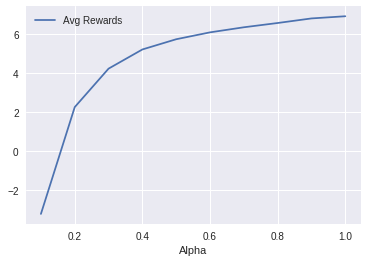

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(r_sums_q_learning)
df.columns = ['Avg Rewards','Alpha', 'Temperature']

fig, ax = plt.subplots()

for key, grp in df.groupby(['Temperature']):
  ax = grp.plot(ax=ax, kind='line', x='Alpha', y='Avg Rewards')

plt.legend(loc='best')
plt.show()

In [ ]:
df 

,Avg Rewards,Alpha,Temperature
0,7.76,0.5,1


In [ ]:
df

,Avg Rewards,Alpha,Temperature
0,8.13,1,1


In [ ]:
df

,Avg Rewards,Alpha,Temperature
0,-0.32,0.1,1


In [ ]:
df = pd.DataFrame({"Sarsa": t_sarsa, 
             "Expected_Sarsa": t_expected_sarsa, 
             "Q-Learning": t_q_learning})
df_ma = df.rolling(100, min_periods = 1).mean()
df_ma.iloc[1:100].plot()


In [ ]:
"""Evaluate agent's performance"""

def performance(value_function):

  total_reward = []
  total_epochs, total_penalties = 0, 0
  episodes = 10
  env = gym.make('Taxi-v2')

  for run in range(10):
    for simulate in range(100):
        for _ in range(episodes):
            state = env.reset()
            epochs, penalties, reward = 0, 0, 0

            done = False

            while not done:
                action = np.argmax(value_function[state])
                state, reward, done, info = env.step(action)

                if reward == -10:
                    penalties += 1

                epochs += 1

            total_penalties += penalties
            total_epochs += epochs
        total_reward.append(reward)


  print(f"Results after {episodes} episodes")
  print(f"Average timesteps per episode: {total_epochs / episodes}")
  print(f"Average penalties per episode: {total_penalties / episodes}")
  
  return total_reward

In [ ]:
t_sarsa = performance(q_sarsa)
t_expected_sarsa = performance(q_e_sarsa)
t_q_learning = performance(q_q_learning)

Results after 10 episodes
Average timesteps per episode: 12537.6
Average penalties per episode: 0.0
Results after 10 episodes
Average timesteps per episode: 12544.6
Average penalties per episode: 0.0
Results after 10 episodes
Average timesteps per episode: 12542.4
Average penalties per episode: 0.0


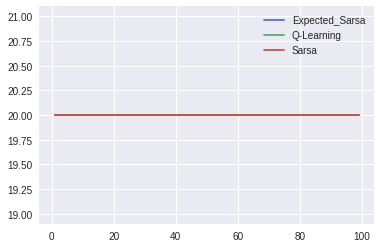

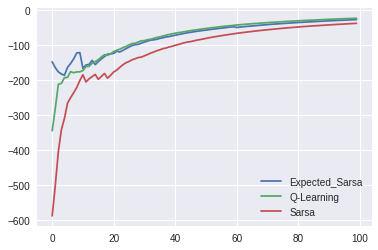

In [ ]:
df = pd.DataFrame({"Sarsa": r_sums_sarsa, 
             "Expected_Sarsa": r_sums_e_sarsa, 
             "Q-Learning": r_sums_q_learning})
df_ma = df.rolling(100, min_periods = 1).mean()
df_ma.iloc[0:100].plot()

In [ ]:
len(df.rolling(100).mean())

1000

In [ ]:
len(df_ma.iloc[0:100])

100